In [1]:
import stable_baselines3 as sb3

from environment import GripperEnv

In [2]:
env = GripperEnv()

In [3]:
agent = sb3.DDPG("MlpPolicy",env,verbose=1,tensorboard_log="./agent_log")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
agent.learn(total_timesteps=500000)

Logging to ./agent_log\DDPG_7
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -5.51e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 31        |
|    time_elapsed    | 128       |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 44.6      |
|    critic_loss     | 116       |
|    learning_rate   | 0.001     |
|    n_updates       | 3000      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -4.53e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 30        |
|    time_elapsed    | 260       |
|    total_timesteps | 8000      |
| train/             |           |
|    actor_loss      | 86        |
|    critic_loss     | 143       |
|    learning_rate   | 0.

In [6]:
from stable_baselines3.common.evaluation import evaluate_policy

In [7]:
evaluate_policy(agent,env,n_eval_episodes=3)

c:\Users\RYZEN\anaconda3\envs\tesis\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-5424.755339329808, 0.0)

In [12]:
import numpy as np

In [15]:
obs = env.reset()
times = []
obss = [obs]
for _ in range(10000):
    action = agent.predict(np.array([obs]))
    new_obs, reward, done, info = env.step(action[0])
    obss.append(new_obs)
    obs = new_obs
env.close()

In [16]:
import matplotlib.pyplot as plt

impor

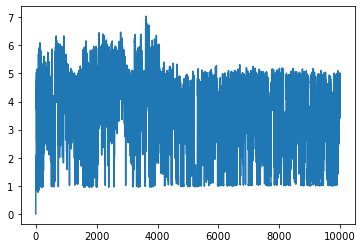

In [17]:
plt.plot(obss)